# Downloads and installs

In [1]:
! gdown "1xfqhYYmeVVbbemn-5Vwpol0Z-nnUemWG"  # OSACT2022-sharedTask-train.csv
! gdown "18FIG-1QrCN58VZW4dYlPOJblPabjHRm1"  # OSACT2022-sharedTask-dev.csv
! gdown "1GStA7e0LgjjqYmoXFH6I8tsgjYy3x-LT"  # OSACT2022-sharedTask-test-tweets.csv
! gdown "1OjrLjr6lZmAYWmGOyhJlHpN-Dh5R5hpS"  # OSACT2022-sharedTask-test-taskA-gold-labels.txt
! gdown "165kzfZDsRTZAAfZKedeZiUlKzMcHNgPd"  # Arabic_stop_words.txt

Downloading...
From: https://drive.google.com/uc?id=1xfqhYYmeVVbbemn-5Vwpol0Z-nnUemWG
To: /content/OSACT2022-sharedTask-train.csv
100% 1.51M/1.51M [00:00<00:00, 13.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18FIG-1QrCN58VZW4dYlPOJblPabjHRm1
To: /content/OSACT2022-sharedTask-dev.csv
100% 212k/212k [00:00<00:00, 4.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GStA7e0LgjjqYmoXFH6I8tsgjYy3x-LT
To: /content/OSACT2022-sharedTask-test-tweets.csv
100% 351k/351k [00:00<00:00, 5.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OjrLjr6lZmAYWmGOyhJlHpN-Dh5R5hpS
To: /content/OSACT2022-sharedTask-test-taskA-gold-labels.txt
100% 16.8k/16.8k [00:00<00:00, 37.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=165kzfZDsRTZAAfZKedeZiUlKzMcHNgPd
To: /content/Arabic_stop_words.txt
100% 6.48k/6.48k [00:00<00:00, 15.4MB/s]


In [2]:
!pip install nlpaug
!pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.2 MB/s eta 0:00:00


# Data Cleaning and Augmentation

## EDA

In [3]:
columns = [
    "id",
    "tweet",
    "off_label",  # Offensive & NotOffensive
    "hs_label",   # Hate Speech [Gender, Race, Ideology, Social Class, Religion, Disability]
    "vlg_label",  # Vulgar
    "violence_label" # Violence
    ]

In [4]:
import pandas as pd
# import csv
# csv.QUOTE_NONE: instructs reader to perform no special processing of quote characters
# train = pd.read_csv("OSACT2022-sharedTask-train.txt", sep="\t", quoting=csv.QUOTE_NONE)

train = pd.read_csv("OSACT2022-sharedTask-train.csv")
train.columns = columns
train.set_index("id", inplace=True)
print(train.info())
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 2 to 8887
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet           8886 non-null   object
 1   off_label       8886 non-null   object
 2   hs_label        8886 non-null   object
 3   vlg_label       8886 non-null   object
 4   violence_label  8886 non-null   object
dtypes: object(5)
memory usage: 416.5+ KB
None


,tweet,off_label,hs_label,vlg_label,violence_label
id,,,,,
2,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
3,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,OFF,NOT_HS,NOT_VLG,NOT_VIO
4,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
5,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
6,حمدلله ماحطها في فمي اساسا😷🤢 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
...,...,...,...,...,...
8883,@USER الله يلعنهم 🤢,OFF,NOT_HS,NOT_VLG,NOT_VIO
8884,واحد سال زوجته بعد كم سنة زواج:<LF>- حبيبتي كم...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8885,@USER يالله روح زي الشاطر واحذف الشو الي سويته...,OFF,NOT_HS,NOT_VLG,NOT_VIO


In [5]:
# some exploration
# tweets labeled as offensive and hate speech
print("tweets labeled as offensive and hate speech:\n", len(train.query("off_label == 'OFF' & hs_label != 'NOT_HS'")))
# tweets labeled as inoffensive and hate speech
print("tweets labeled as inoffensive and hate speech:\n", len(train.query("off_label == 'NOT_OFF' & hs_label != 'NOT_HS'"))) # labels are well-maintained
# tweets labeled as offensive only
print("tweets labeled as offensive only:\n", len(train.query("off_label == 'OFF' & hs_label == 'NOT_HS'")))

tweets labeled as offensive and hate speech:
 959
tweets labeled as inoffensive and hate speech:
 0
tweets labeled as offensive only:
 2212


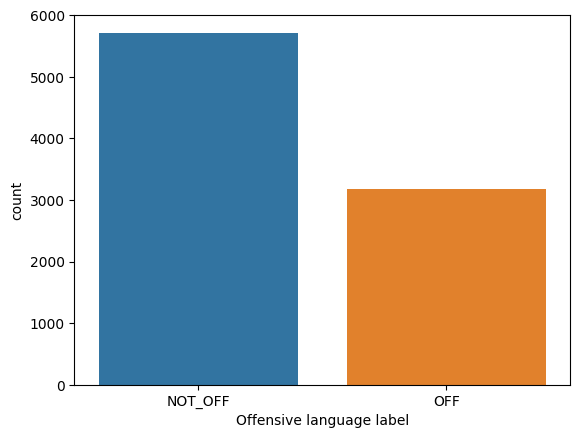

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train.off_label)
plt.xlabel('Offensive language label');

In [7]:
dev = pd.read_csv("OSACT2022-sharedTask-dev.csv")
dev.columns = columns
dev.set_index("id", inplace=True)
print(dev.info())
dev

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 8889 to 10157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet           1269 non-null   object
 1   off_label       1269 non-null   object
 2   hs_label        1269 non-null   object
 3   vlg_label       1269 non-null   object
 4   violence_label  1269 non-null   object
dtypes: object(5)
memory usage: 59.5+ KB
None


,tweet,off_label,hs_label,vlg_label,violence_label
id,,,,,
8889,#داليا_مبارك<LF>مادري ليش تقرفت😷,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8890,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8891,@USER هييه والله وااايدد 🔪🔪🔪💔💔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8892,اكيد اخس شي 😤 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
8893,مابي شي الحين غير فراشي😣,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
...,...,...,...,...,...
10153,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
10154,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,OFF,NOT_HS,NOT_VLG,NOT_VIO
10155,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,OFF,NOT_HS,NOT_VLG,NOT_VIO


In [8]:
test = pd.read_csv("OSACT2022-sharedTask-test-tweets.csv")
test.columns = ["id", "tweet"]
label_offensive = pd.read_csv("OSACT2022-sharedTask-test-taskA-gold-labels.txt")
label_offensive.columns = ["off_label"]


test = test.join(label_offensive)
test.set_index("id", inplace=True)
print(test.info())

test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 10159 to 12698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      2540 non-null   object
 1   off_label  2540 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB
None


,tweet,off_label
id,,
10159,مشفتش العرض بتاعهم لا مش مهتمة لا😩🐸😂 URL,NOT_OFF
10160,RT @USER عندما تكون لوحدك تحس انك لحالك صح 😊<L...,NOT_OFF
10161,RT @USER ماشاء الله الرجال باين عليه محترم <LF...,NOT_OFF
10162,@USER شسالفة احد يفهمني 😤,NOT_OFF
10163,@USER اقووووول استريح عاد احتفالاتنا تحط اغاني...,NOT_OFF
...,...,...
12694,قله حيا وين اهلهم ذولي الله لايبلانا لهالدرجه ...,OFF
12695,RT @USER ثم الطحلبه🐸🐸🐸 URL,OFF
12696,يا وجه الله 😷 من اليوم ورايح شاورما انسى 🔪 URL,NOT_OFF


In [9]:
# keep useful columns
train = train[["tweet", "off_label"]]
print(train.info(), "\n\n")
dev = dev[["tweet", "off_label"]]
print(dev.info(), "\n\n")
test = test[["tweet", "off_label"]]
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 2 to 8887
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8886 non-null   object
 1   off_label  8886 non-null   object
dtypes: object(2)
memory usage: 208.3+ KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 8889 to 10157
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1269 non-null   object
 1   off_label  1269 non-null   object
dtypes: object(2)
memory usage: 29.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 10159 to 12698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      2540 non-null   object
 1   off_label  2540 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB
None


## Data cleaning


In [10]:
##imports
import string
import re
from bs4 import BeautifulSoup
from pyarabic import araby

def clean_str(text , stop_words=None):

  # remove stop words
  if stop_words != None:
    text = remove_stop_words(text , stop_words)



  # remove < , > to remove html tags
  punctuation = string.punctuation
  punctuation = punctuation.replace("<", "")
  punctuation = punctuation.replace(">", "")
  table = str.maketrans(dict.fromkeys(punctuation))

  #removing links, users and html tags
  text = text.replace('URL', '')
  text = text.replace('url', '')
  text = text.replace('RT', '')
  text = text.replace('rt', '')
  text = text.replace('@USER', '')
  text = text.replace('@user', '')
  # text = text.translate(table)
  text = BeautifulSoup(text, features='html.parser').get_text()

  #remove Diacritics (except shadda) and tatweel
  text = araby.strip_harakat(text)
  text = araby.strip_tatweel(text)

  #alef normalization
  text = araby.normalize_ligature(text)
  text = text.replace('أ' , 'ا')
  text = text.replace('إ' , 'ا')
  text = text.replace('آ' , 'ا')

  #punc normalization
  text = text.replace('؟' , '?')
  text = text.replace('،' , ',')
  text = text.replace(';' , ';')
  #numbers normalization
  west_nums = araby.NUMBERS_WEST
  east_nums = araby.NUMBERS_EAST
  for i in range(10):
    text = text.replace(east_nums[i] , west_nums[i])



  #hashtag segmentation
  text = hashtag_seg(text)
  #remove symbols
  text = re.sub(r"[—/#\[\]{}\-_*@\\]" , " " ,text)
  return text

def hashtag_seg(text):
  """
  Splits a hashtag into normal words.
  Args:
    hashtag: The hashtag to be split.
  Returns:
    A string with but the hashtags are segmented.
  """
  words = araby.tokenize(text)
  for i in range(len(words)):
    if(words[i].startswith("#")):
      words[i] = words[i][1:].replace("_" , " ") + " "

  # words = []
  # for match in re.finditer(r"[\u0621-\u064A\u0660-\u06690-9 ]+", text):
    # words.append(match.group())

  return " ".join(words)



def remove_stop_words(text, stop_words):
    # Split the text into words
    words = text.split()
    # Filter out the words that are in the stop_words list
    filtered_words = [word for word in words if word not in stop_words]
    # Join the filtered words back into a string
    filtered_text = " ".join(filtered_words)
    # Return the filtered text
    return filtered_text




In [11]:
arabic_stop_words=[]
with open ('./Arabic_stop_words.txt',encoding='utf-8') as f :
    for word in f.readlines() :
        arabic_stop_words.append(word.split("\n")[0])

In [12]:
print("Cleaning and parsing the training dataset...\n")

train["tweet_clean"] = train["tweet"].apply(lambda x: clean_str(x , arabic_stop_words))

train.head()

Cleaning and parsing the training dataset...



<ipython-input-10-f546543a5dc9>:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, features='html.parser').get_text()
<ipython-input-12-be0cf3a61f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tweet_clean"] = train["tweet"].apply(lambda x: clean_str(x , arabic_stop_words))


,tweet,off_label,tweet_clean
id,,,
2,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_OFF,وصارت فطاير البقالات غذاء صحي 👎🏻
3,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,OFF,روحي لبريده تلقين اشباه كثير بس ماحد زيكم مشفو...
4,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_OFF,مش باين حاجه خالص 😣 مش عارف بقى 😔
5,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_OFF,اليوم الاثنين 👏 يقولك :% 90 المسلمين عندهم خ...
6,حمدلله ماحطها في فمي اساسا😷🤢 URL,NOT_OFF,حمدلله ماحطها فمي اساسا 😷🤢


In [13]:
print("Cleaning and parsing the development dataset...\n")

dev["tweet_clean"] = dev["tweet"].apply(lambda x: clean_str(x , arabic_stop_words))

dev.head()

<ipython-input-10-f546543a5dc9>:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, features='html.parser').get_text()


Cleaning and parsing the development dataset...



<ipython-input-13-ebb1a854537b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["tweet_clean"] = dev["tweet"].apply(lambda x: clean_str(x , arabic_stop_words))


,tweet,off_label,tweet_clean
id,,,
8889,#داليا_مبارك<LF>مادري ليش تقرفت😷,NOT_OFF,داليا مباركمادري ليش تقرفت 😷
8890,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,NOT_OFF,"ابديت السناب الجديد ❌ حاس الناس حوس , اشوف مشا..."
8891,@USER هييه والله وااايدد 🔪🔪🔪💔💔,NOT_OFF,هييه والله وااايدد 🔪🔪🔪💔💔
8892,اكيد اخس شي 😤 URL,NOT_OFF,اكيد اخس شي 😤
8893,مابي شي الحين غير فراشي😣,NOT_OFF,مابي شي الحين فراشي 😣


In [14]:
print("Cleaning and parsing the test dataset...\n")

test["tweet_clean"] = test["tweet"].apply(lambda x: clean_str(x , arabic_stop_words))

dev.head()

Cleaning and parsing the test dataset...



,tweet,off_label,tweet_clean
id,,,
8889,#داليا_مبارك<LF>مادري ليش تقرفت😷,NOT_OFF,داليا مباركمادري ليش تقرفت 😷
8890,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,NOT_OFF,"ابديت السناب الجديد ❌ حاس الناس حوس , اشوف مشا..."
8891,@USER هييه والله وااايدد 🔪🔪🔪💔💔,NOT_OFF,هييه والله وااايدد 🔪🔪🔪💔💔
8892,اكيد اخس شي 😤 URL,NOT_OFF,اكيد اخس شي 😤
8893,مابي شي الحين غير فراشي😣,NOT_OFF,مابي شي الحين فراشي 😣


In [15]:
label2id = {"NOT_OFF": 0, "OFF": 1}
id2label = {0: "NOT_OFF", 1: "OFF"}
train['class'] = train['off_label'].apply(lambda x: label2id[x])
train=train[["tweet_clean", "class"]]
train.head()

<ipython-input-15-7c1ce82c7c22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['class'] = train['off_label'].apply(lambda x: label2id[x])


,tweet_clean,class
id,,
2,وصارت فطاير البقالات غذاء صحي 👎🏻,0
3,روحي لبريده تلقين اشباه كثير بس ماحد زيكم مشفو...,1
4,مش باين حاجه خالص 😣 مش عارف بقى 😔,0
5,اليوم الاثنين 👏 يقولك :% 90 المسلمين عندهم خ...,0
6,حمدلله ماحطها فمي اساسا 😷🤢,0


In [16]:
dev['class'] = dev['off_label'].apply(lambda x: label2id[x])
dev=dev[["tweet_clean", "class"]]
dev.head(1)

<ipython-input-16-0ef1b867368b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev['class'] = dev['off_label'].apply(lambda x: label2id[x])


,tweet_clean,class
id,,
8889,داليا مباركمادري ليش تقرفت 😷,0


In [17]:
test['class'] = test['off_label'].apply(lambda x: label2id[x])
test=test[["tweet_clean", "class"]]
test.head()

,tweet_clean,class
id,,
10159,مشفتش العرض بتاعهم مش مهتمة لا 😩🐸😂,0
10160,لوحدك تحس انك لحالك صح 😊 حتى انا مثلك 🌚😂😂😂😂🐸💔✋...,0
10161,ماشاء الله الرجال باين محترم البنات تعقلوا 😡 ...,0
10162,شسالفة يفهمني 😤,0
10163,اقووووول استريح احتفالاتنا تحط اغانينا 😡😡,0


## Determine tweet maximum length

In [18]:
# max tweet length
import nltk
train['length'] = train['tweet_clean'].apply(lambda x:len(araby.tokenize(x)))
print("Maximum tweet length \n", train['length'].max())
train.query("length > 50")

Maximum tweet length 
 57


,tweet_clean,class,length
id,,,
5,اليوم الاثنين 👏 يقولك :% 90 المسلمين عندهم خ...,0,55
757,"عمتي انجبت بنات , زوجها يهددها بالزواج اخرى , ...",1,57
3546,عرفت البلد دي مافيها خير .. لمن مشيت بنك البرك...,0,53


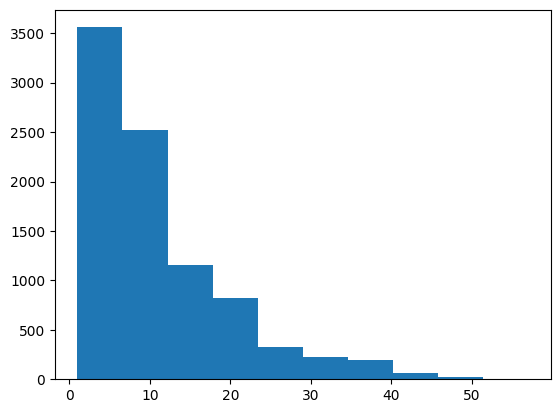

In [19]:
#histogram of tweets lengthes
plt.hist(train['length'])
plt.show()

## Data Augmentation

In [20]:
# import zipfile

# zip_file = zipfile.ZipFile("nlpaug.zip")
# zip_file.extractall()
# zip_file.close()

In [21]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.6 MB/s eta 0:00:00


In [22]:
from nlpaug.augmenter.word import ContextualWordEmbsAug
from sklearn.utils import shuffle
from tqdm import tqdm
import transformers
import numpy as np

In [23]:
# BERT Augmentator
TOPK=20        # default=100
ACT = 'insert' # "substitute"

aug_bert = ContextualWordEmbsAug(
    model_path= 'UBC-NLP/MARBERT',
    # model_path='distilbert-base-uncased',
    # device='cuda',
    action=ACT,
    top_k=TOPK)

def augment_text(df, augmenter, label_name, label_val, samples=100, pr=0.2, show = 0):
    augmenter.aug_p = pr
    new_text=[]

    # selecting the minority class samples
    df_n = df[df[label_name]==label_val].reset_index(drop=True)

    # data augmentation loop
    for i in tqdm(np.random.randint(0, len(df_n), samples)):
            text = df_n.iloc[i]['tweet_clean']
            augmented_text = augmenter.augment(text)
            if show:
                print(f"The original text: {text}")
                print(f"The augmented text: {augmented_text}")
                print('-'*100)
            new_text.append(augmented_text)

    # dataframe
    new = pd.DataFrame({'tweet_clean':new_text,label_name:label_val})
    df = shuffle(pd.concat([df,new]).reset_index(drop=True))
    return df

In [24]:
# show sample of augmented offensive tweets
aug_df = augment_text(train, aug_bert, 'class', label_val =1, samples=5, show=True)

 20%|██        | 1/5 [00:05<00:22,  5.74s/it]

The original text: ايفانكا كلنا ندري طقطقه ولاهي داريه هوى دارهم بس اللي يستحون سعوووووودي احرجوه واحرجوا اهله منجد تستح فافعل ماتشاء تربيه 👎🏽
The augmented text: ['بو ايفانكا كلنا حنا ندري طقطقه ولاهي انا داريه هوى دارهم ، بس اللي يستحون سعوووووودي احرجوه واحرجوا اهله ان منجد تستح فافعل ماتشاء بلا تربيه 👎🏽']
----------------------------------------------------------------------------------------------------


 40%|████      | 2/5 [00:08<00:12,  4.27s/it]

The original text: الله يقطع شيطانك 😣😣😣 سديتي نفسيشكلي بحول كبده الصاج 😠
The augmented text: ['الله يقطعك يقطع شيطانك اهلك 😣😣😣 سديتي نفسيشكلي انا بحول كبده الصاج 😠']
----------------------------------------------------------------------------------------------------


 60%|██████    | 3/5 [00:10<00:05,  2.99s/it]

The original text: للاسف 😷👎🤢😡... الاماني بفشل البطوله شالله
The augmented text: ['للاسف [UNK]... كل الاماني تتعلق بفشل البطوله شالله']
----------------------------------------------------------------------------------------------------


 80%|████████  | 4/5 [00:12<00:02,  2.80s/it]

The original text:   بايع الكليجاالله يفشلكم فشلتونا يالمراهقاتانا استحيت تصرفات البنات وتعليقاتهم وانا مالي دخل 😷
The augmented text: ['بايع يهدي الكليجاالله يفشلكم بس فشلتونا عندنا يالمراهقاتانا استحيت من تصرفات البنات وتعليقاتهم وانا مالي دخل 😷']
----------------------------------------------------------------------------------------------------


100%|██████████| 5/5 [00:13<00:00,  2.65s/it]

The original text: شعب الله المتحشر 🤮
The augmented text: ['شعب اجلكم الله المتحشر [UNK]']
----------------------------------------------------------------------------------------------------


In [25]:
# augment offensive tweets
off_count = train.loc[train['class'] == 1].shape[0]
not_off_count = train.loc[train['class'] == 0].shape[0]
num_samples = not_off_count - off_count

off_aug_df = augment_text(train, aug_bert,label_name='class', label_val = 1, samples=num_samples, show=False)

100%|██████████| 2544/2544 [54:30<00:00,  1.29s/it]


In [26]:
punctuation = string.punctuation
for p in punctuation:
    if p != '[' and p != ']':
        punctuation = punctuation.replace(p, '')

# convert augmented text to string instead of list
off_aug_df['tweet_clean'] = off_aug_df['tweet_clean'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
# remove the UNK token
off_aug_df['tweet_clean'] = off_aug_df['tweet_clean'].str.replace('UNK', '')
# remove the brackets
table = str.maketrans(dict.fromkeys(punctuation))
off_aug_df["tweet_clean"] = off_aug_df["tweet_clean"].str.translate(table)

In [27]:
# applying text cleaning on augmentated data and lengthes
off_aug_df["tweet_clean"] = off_aug_df["tweet_clean"].apply(lambda x: clean_str(x , arabic_stop_words))
off_aug_df['length'] = off_aug_df['tweet_clean'].apply(lambda x:len(araby.tokenize(x)))
print("Maximum tweet length \n", off_aug_df['length'].max())
off_aug_df.head()

Maximum tweet length 
 64


,tweet_clean,class,length
5235,نبي عمالة 😠 اخلص سوتهم انهم عايشين بالبارادايس...,1,15
228,ماهوووو 😷,0,2
8543,والله ازعجونا ياخي مهو لدرجه 🤮,0,6
904,احنا محفولين مكفولين 🐸,0,4
10329,شكرا بايع الكليجا خاص vipللقوارير المعرض الجاي...,1,21


In [28]:
off_aug_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 5235 to 1537
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_clean  11430 non-null  object
 1   class        11430 non-null  int64 
 2   length       11430 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 357.2+ KB


## Saving data

In [29]:
#saving and loading cleaned augmantated data

# import pickle
# with open('off_aug_df.pkl', 'wb') as f:
#     pickle.dump(off_aug_df, f)

# with open('dev.pkl', 'wb') as f:
#     pickle.dump(dev, f)

# with open('test.pkl', 'wb') as f:
#     pickle.dump(test, f)

# from google.colab import files
# files.download('off_aug_df.pkl')
# files.download('dev.pkl')
# files.download('test.pkl')



### Imports

In [30]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from tqdm import tqdm
import transformers
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


### Loading cleaned augmented Data

In [31]:
# import pickle
# with open('off_aug_df.pkl', 'rb') as f:
#     df = pickle.load(f)

# with open('dev.pkl', 'rb') as f:
#     dev = pickle.load(f)

# with open('test.pkl', 'rb') as f:
#     test = pickle.load(f)

# off_aug_df = df
# df.head()

### Data preprocessing

#### Embedding

In [32]:
#convert data to embedding vectors using marbert

from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf


marbert_model_path = 'UBC-NLP/MARBERT'
tokenizer = AutoTokenizer.from_pretrained(marbert_model_path, from_tf=True)
marbert_model = TFAutoModel.from_pretrained(marbert_model_path, output_hidden_states=True)

def bert_tokenize(texts: str) -> list:
    max_len = 0
    for text in texts:
        max_len = max(len(tokenizer.tokenize(f'[CLS] {text} [SEP]')), max_len)
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len)
    return (tokens['input_ids'], tokens['attention_mask'], tokens['token_type_ids'])

def get_embeddings(tokens):
    ids = tf.convert_to_tensor(tokens[0])
    mask = tf.convert_to_tensor(tokens[1])
    type_ids = tf.convert_to_tensor(tokens[2])
    hidden_states = marbert_model(input_ids=ids, attention_mask=mask, token_type_ids=type_ids)[2]
    sentence_embd = tf.reduce_mean(tf.reduce_sum(tf.stack(hidden_states[-4:]), axis = 0), axis=1)
    return sentence_embd

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at UBC-NLP/MARBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [33]:
# prepare training labels
off_aug_df['class'] = off_aug_df['class'].astype(np.int32)
y_train = off_aug_df['class'].values

# prepare development labels
dev['class'] = dev['class'].astype(np.int32)
y_dev = dev['class'].values

# prepare test dataset labels
test['class'] = test['class'].astype(np.int32)
y_test = test['class'].values

In [ ]:
# extract training dataset features
text_offensive = off_aug_df['tweet_clean'].values
batch_size = 64
train_num_batches = text_offensive.shape[0] // batch_size
train_rem = text_offensive.shape[0] % batch_size

X_train = np.empty(shape=(text_offensive.shape[0], 768), dtype=np.float64)
for batch_step in tqdm(range(1, train_num_batches), desc='getting training features..'):
    i = batch_step - 1
    tokens = bert_tokenize(list(text_offensive[i * batch_size: batch_step * batch_size]))
    X_train[i * batch_size : batch_step * batch_size] = get_embeddings(tokens)

if train_rem != 0:
    tokens = bert_tokenize(list(text_offensive[text_offensive.shape[0] - train_rem: ]))
    X_train[text_offensive.shape[0] - train_rem: ] = get_embeddings(tokens)

print(X_train.shape)

getting training features..:   1%|          | 2/177 [00:32<45:24, 15.57s/it]

In [ ]:
# extract development dataset features
text_offensive = dev['tweet_clean'].values
batch_size = 64
dev_num_batches = text_offensive.shape[0] // batch_size
dev_rem = text_offensive.shape[0] % batch_size

X_dev = np.empty(shape=(text_offensive.shape[0], 768), dtype=np.float64)
for batch_step in tqdm(range(1, dev_num_batches), desc='getting dev features..'):
    i = batch_step - 1
    tokens = bert_tokenize(list(text_offensive[i * batch_size: batch_step * batch_size]))
    X_dev[i * batch_size : batch_step * batch_size] = get_embeddings(tokens)

if dev_rem != 0:
    tokens = bert_tokenize(list(text_offensive[text_offensive.shape[0] - dev_rem: ]))
    X_dev[text_offensive.shape[0] - dev_rem: ] = get_embeddings(tokens)

print(X_dev.shape)

In [ ]:
# extract test dataset features
text_offensive = test['tweet_clean'].values
batch_size = 64
test_num_batches = text_offensive.shape[0] // batch_size
test_rem = text_offensive.shape[0] % batch_size

X_test = np.empty(shape=(text_offensive.shape[0], 768), dtype=np.float64)
for batch_step in tqdm(range(1, test_num_batches), desc='getting test features..'):
    i = batch_step - 1
    tokens = bert_tokenize(list(text_offensive[i * batch_size: batch_step * batch_size]))
    X_test[i * batch_size : batch_step * batch_size] = get_embeddings(tokens)

if test_rem != 0:
    tokens = bert_tokenize(list(text_offensive[text_offensive.shape[0] - test_rem: ]))
    X_test[text_offensive.shape[0] - test_rem: ] = get_embeddings(tokens)

print(X_test.shape)

#### Standard Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_dev_scaled = scaler.transform(X_dev)



#### Saving/loading embeddings

In [ ]:
import pickle
from google.colab import files



def save(name_to_var):
  for name in name_to_var.keys():
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(name_to_var[name], f)
        files.download(f'{name}.pkl')


def load(names):
  vars = []
  for name in names:
    with open(f'{name}.pkl', 'rb') as f:
      vars.append(pickle.load(f))
  return tuple(vars)



# name_to_var ={
#     "X_train" : X_train,
#     "y_train" : y_train,
#     "X_dev" : X_dev,
#     "y_dev" : y_dev,
#     "X_test" : X_test,
#     "y_test" : y_test,
#     "X_train_scaled" : X_train_scaled,
#     "X_dev_scaled" : X_dev_scaled,
#     "X_test_scaled" : X_test_scaled
# }
# save(name_to_var)

# names = ['X_train' , 'y_train', 'X_dev' , 'y_dev' , 'X_test' , 'y_test' , 'X_train_scaled', 'X_dev_scaled' , 'X_test_scaled']
# X_train , y_train, X_dev , y_dev , X_test , y_test , X_train_scaled  , X_dev_scaled , X_test_scaled = load(names)
